In [56]:
import requests
import pandas as pd
import numpy as np

In [152]:
company = 'WMT'
api_key = '6032af0c940166a822afd34fc3259c71'

In [153]:

# Gets the Income Statement data that we need
income_state = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?apikey={api_key}').json()
revenue = {}
interest_expense = {}
income_before_tax = {}
income_tax_expense = {}
net_income = {}
count = 0
for item in income_state:

    if count < 10:
        revenue[item['date']] = item['revenue']
        interest_expense[item['date']] = item['interestExpense']
        income_before_tax[item['date']] = item['incomeBeforeTax']
        income_tax_expense[item['date']] = item['incomeTaxExpense']
        net_income[item['date']]= item['netIncome']
        count += 1
# Get the Cash Flow Statement that we need

cash_flow = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?apikey={api_key}').json()

cf_from_operating_activities = {}
capital_expenditures = {}
free_cash_flow = {}
count = 0
for item in cash_flow:
    if count < 10:
        cf_from_operating_activities[item['date']] = item['operatingCashFlow']
        capital_expenditures[item['date']] = item['capitalExpenditure']
        free_cash_flow[item['date']] = item['freeCashFlow']
        count += 1

# Gets the Balance Sheet Statement Data we need

balance_sheet  = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?apikey={api_key}').json()

short_term_debt = {}
long_term_debt = {}
cash_and_short_term_invest = {}
count = 0
for item in balance_sheet:
    if count < 10:
        short_term_debt[item['date']] = item['totalCurrentLiabilities']
        long_term_debt[item['date']] = item['longTermDebt']
        cash_and_short_term_invest[item['date']] = item['cashAndShortTermInvestments']
        count += 1

# Income statement (IS) data frame

In [175]:
# Dictionary that will hold all of the income statement data for display to a df
income_statement = {}

income_statement['revenue'],income_statement['interest_expense'],income_statement['income_before_tax'],income_statement['income_tax_expense'],income_statement['net_income'] = revenue, interest_expense,income_before_tax, income_tax_expense, net_income 

In [201]:
# 
is_df = pd.DataFrame.from_dict(income_statement,orient='index').T

is_df.sort_index(inplace= True)
is_df


,revenue,interest_expense,income_before_tax,income_tax_expense,net_income
2011-01-31,421849000000,2205000000,23538000000,-7579000000,16389000000
2012-01-31,446950000000,2322000000,24398000000,7944000000,15699000000
2013-01-31,469162000000,-2064000000,25737000000,7981000000,16999000000
2014-01-31,476294000000,-2216000000,24656000000,8105000000,16022000000
2015-01-31,485651000000,2461000000,24799000000,7985000000,16363000000
2016-01-31,482130000000,2548000000,21638000000,6558000000,14694000000
2017-01-31,485873000000,2367000000,20497000000,6204000000,13643000000
2018-01-31,500343000000,2330000000,15123000000,4600000000,9862000000
2019-01-31,514405000000,2346000000,11460000000,4281000000,6670000000
2020-01-31,523964000000,2599000000,20116000000,4915000000,14881000000


# Cash Flow statement (CF) data frame

In [177]:
cash_flow_state = {}

cash_flow_state["cfo"],cash_flow_state["capex"],cash_flow_state["free_cash_flow"] = cf_from_operating_activities, capital_expenditures,free_cash_flow 


In [204]:
cf_df = pd.DataFrame.from_dict(cash_flow_state,orient='index').T

cf_df.sort_index(inplace = True)
cf_df

,cfo,capex,free_cash_flow
2011-01-31,23643000000,-12699000000,10944000000
2012-01-31,24255000000,-13510000000,10745000000
2013-01-31,25591000000,-12898000000,12693000000
2014-01-31,23257000000,-13115000000,10142000000
2015-01-31,28564000000,-12174000000,16390000000
2016-01-31,27552000000,-11477000000,16075000000
2017-01-31,31673000000,-10619000000,21054000000
2018-01-31,28337000000,-10051000000,18286000000
2019-01-31,27753000000,-10344000000,17409000000
2020-01-31,25255000000,-10705000000,14550000000


# Balance Sheet Statement (BS) data frame(df)

In [179]:
balance_sheet_state = {}

balance_sheet_state["short_term_debt"],balance_sheet_state["long_term_debt"],balance_sheet_state["cash_and_sti"] = short_term_debt,long_term_debt,cash_and_short_term_invest

In [205]:
bs_df = pd.DataFrame.from_dict(balance_sheet_state,orient='index').T

bs_df.sort_index(inplace= True)

bs_df

,short_term_debt,long_term_debt,cash_and_sti
2011-01-31,58484000000,43842000000,7395000000
2012-01-31,62300000000,47079000000,6003000000
2013-01-31,71818000000,41417000000,7066000000
2014-01-31,69345000000,44559000000,6627000000
2015-01-31,65253000000,43495000000,9135000000
2016-01-31,64619000000,44030000000,8343000000
2017-01-31,66928000000,38809000000,6602000000
2018-01-31,78521000000,32784000000,6456000000
2019-01-31,77477000000,46340000000,7722000000
2020-01-31,77790000000,48021000000,9465000000


In [289]:
# Calculates free cash flow to profit margin

# Takes the free cash flow for every year and divides it by the net income.
fcf_to_net_income_margin = (cf_df.free_cash_flow/is_df.net_income).mean()
fcf_to_net_income_margin

1.1812731679082584

# Plot that will be returned for users.

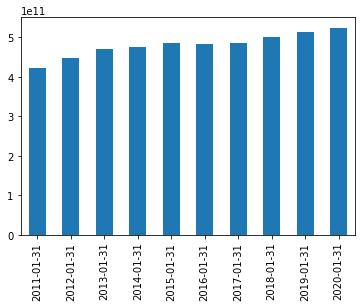

In [300]:
revenue_chart = is_df.revenue.plot.bar()

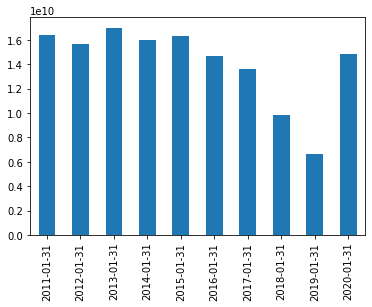

In [294]:
net_income_chart = is_df.net_income.plot.bar()


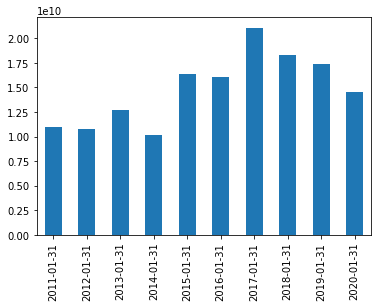

In [297]:
fcf_chart = cf_df.free_cash_flow.plot.bar()

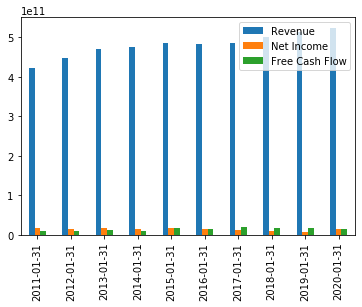

In [302]:
revenue_to_net_income_to_fcf_df = pd.DataFrame({'Revenue':is_df.revenue,"Net Income":is_df.net_income,"Free Cash Flow":cf_df.free_cash_flow})
r_to_ni_fcf_chart = revenue_to_net_income_to_fcf_df.plot.bar()

# Revenue Projections

In [290]:
revenue_growth_rate = is_df.revenue.pct_change().mean()

In [288]:
revenue_growth_rate

0.02455870805893343

In [303]:
recent_year_data = 2020
project_year = [recent_year_data+1 for i in range(4)]



In [304]:
project_year

[2021, 2021, 2021, 2021]